In [ ]:
 %tensorflow_version 2.x

In [ ]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


Creating Tensors


In [ ]:
string = tf.Variable("This is a string",tf.string)
number = tf.Variable(1,tf.int16)
floating = tf.Variable(3.421,tf.float64)

In [ ]:
rank1 = tf.Variable(["This is a list"],tf.string)
rank2 = tf.Variable([["This is also a list"],["Here is another"]],tf.string)
rank3 = tf.Variable([[["This is also a list"],["Here is another"]],[["ABC"],["DSA"]]],tf.string)
rank4 = tf.Variable([["This is also a list","Here is another"],["Hello","World"]],tf.string)

In [ ]:
tf.rank(rank2)
rank2.shape

TensorShape([2, 1])

In [ ]:
tf.rank(rank1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [ ]:
tf.rank(rank3)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [ ]:
rank3.shape

TensorShape([2, 2, 1])

In [ ]:
rank4.shape

TensorShape([2, 2])

In [ ]:
tensor1 = tf.ones([1,2,3])

In [ ]:
tensor1

<tf.Tensor: shape=(1, 2, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

In [ ]:
tensor2 = tf.reshape(tensor1,[3,2,1])
tensor3 = tf.reshape(tensor1,[3,2])
tensor4 = tf.reshape(tensor1,[3,1,2])
tensor5 = tf.reshape(tensor1,[1,3,2])
tensor6 = tf.reshape(tensor1,[3,-1]) # -1 autocalculates the required dimensions as per the given previous digit

In [ ]:
print(tensor2)
print(tensor3)
print(tensor4)
print(tensor5)
print(tensor6)

tf.Tensor(
[[[1.]
  [1.]]

 [[1.]
  [1.]]

 [[1.]
  [1.]]], shape=(3, 2, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[[1. 1.]]

 [[1. 1.]]

 [[1. 1.]]], shape=(3, 1, 2), dtype=float32)
tf.Tensor(
[[[1. 1.]
  [1. 1.]
  [1. 1.]]], shape=(1, 3, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


Types of Tensors
1. Variable
2. Constant
3. Placeholder
4. Sparse Tensor

Expect Variable all other tensors are immuttable, meaning their value might not change during execution

So we use a Variable or assign it to something when we wish to potentially change it's value

In order to evaluate a tensor we need to create a session

In [ ]:
# with tf.Session() as sess:
        #tensor.eval()

Linear Regression

(0.0, 8.0, 0.0, 20.0)

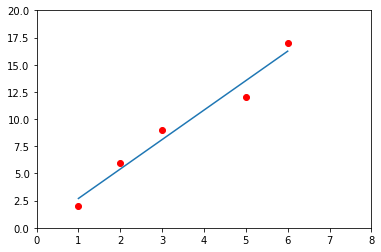

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = [1,2,3,5,6]
y = [2,6,9,12,17]
plt.plot(x,y,'ro')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.axis([0,8,0,20]) 

In [ ]:
!pip install -q sklearn 

In [ ]:
from __future__ import absolute_import,division,print_function,unicode_literals

import pandas as pd
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#Load Dataset 
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') #training data set
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data set

y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [ ]:
y_eval.head()

0    0
1    0
2    1
3    1
4    1
Name: survived, dtype: int64

In [ ]:
dftrain.loc[0] #Returns row 1

sex                          male
age                            22
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object

In [ ]:
dftrain["class"] # Return a specific column

0       Third
1       First
2       Third
3       First
4       Third
        ...  
622    Second
623     Third
624     First
625     Third
626     Third
Name: class, Length: 627, dtype: object

In [ ]:
ages = dftrain["age"]
print(ages)

0      22.0
1      38.0
2      26.0
3      35.0
4      28.0
       ... 
622    28.0
623    25.0
624    19.0
625    28.0
626    32.0
Name: age, Length: 627, dtype: float64


In [ ]:
survival = dftrain.loc[0]

In [ ]:
survival

sex                          male
age                            22
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object

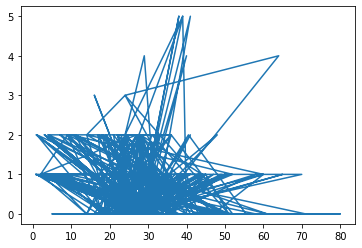

In [ ]:
plt.plot(ages,survival)

In [ ]:
 dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


To get a statistic approach of a data,  we use .describe()

In [ ]:
dftrain.describe() # Gives mean 

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

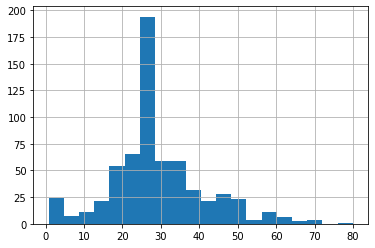

In [ ]:
dftrain.age.hist(bins=20)

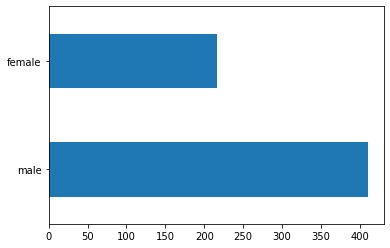

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

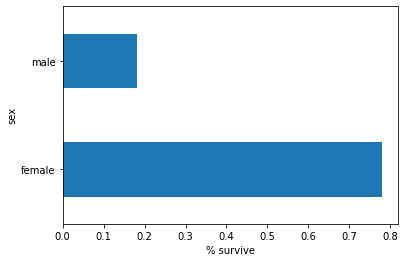

In [ ]:
pd.concat([dftrain,y_train],axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

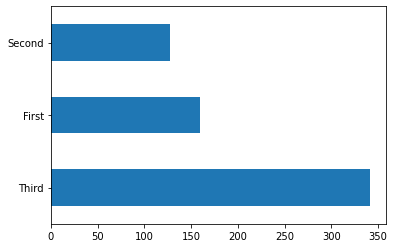

In [ ]:
dftrain['class'].value_counts().plot(kind='barh')

In [ ]:
dfeval.shape

(264, 9)

In [ ]:
import numpy as np
import math 
import timeit

In [ ]:
%timeit math.sqrt(9871)

The slowest run took 26.06 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 118 ns per loop


In [ ]:
%timeit np.sqrt(9871)

The slowest run took 47.78 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 1.13 µs per loop


In [ ]:
%timeit pow(9871,.5)

The slowest run took 38.88 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 199 ns per loop


In [ ]:
 #Load Dataset 
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') #training data set
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data set

y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')


Categorical_Columns = ['sex','n_siblings_spouses','parch','class','deck','embark_town','alone']

Numerical_Columns = ['age','fare']

feature_columns = []
for i in Categorical_Columns:
  vocab = dftrain[i].unique() #get a list of all the unique values from a given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(i,vocab))

for i in Numerical_Columns:
  feature_columns.append(tf.feature_column.numeric_column(i,dtype=tf.float32))

In [ ]:
feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

In [ ]:
 def my_input_function(data_df, label_df, num_of_epochs=10, shuffle = True, batch_size=32):
   def input_function():
     ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
     if shuffle:
       ds = ds.shuffle(1000)
     ds = ds.batch(batch_size).repeat(num_of_epochs)
     return ds
   return input_function

train_input_fn = my_input_function(dftrain,y_train)
eval_input_fn = my_input_function(dfeval,y_eval,num_of_epochs=1,shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

linear_est.train(train_input_fn) #train
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result['accuracy'])
print(result)

0.74242425
{'accuracy': 0.74242425, 'accuracy_baseline': 0.625, 'auc': 0.83388436, 'auc_precision_recall': 0.79677683, 'average_loss': 0.47859967, 'label/mean': 0.375, 'loss': 0.47138706, 'precision': 0.65346533, 'prediction/mean': 0.40086004, 'recall': 0.6666667, 'global_step': 200}


In [ ]:
result = list(linear_est.predict(eval_input_fn))

print(dfeval.loc[4])
print(result[4]['probabilities'][1])
print(y_eval.loc[4])

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpgwdukpfc/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                            34
n_siblings_spouses              0
parch                           0
fare                           13
class                      Second
deck                            D
embark_town           Southampton
alone                           y
Name: 4, dtype: object
0.28495526
1
